In [5]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import pylab as py
import warnings
warnings.filterwarnings("ignore")

In [6]:
os.chdir(r"C:\Users\omsai\Downloads")
data = pd.read_csv('insurance_data.csv')


## Need for this study

### We had been posed with an Insurance dataset

### Intuitively, A proper (regression) analysis of the given problem could help the NBFC or bank by prediction of the insurance claim to cut it’s losses, manage current policies or introduce new policies concerning Insurance, 
### But as we ruffled the feathers of the problem , we realized the data to have a variety of attributes of different types which may or may not have a role to play in our quest to predict the insurance claim. Their relation not only individually but also as groups of two or more with the ‘Insurance Claim Amount’ would have an impact on the final decisions to be made by the bank.

### This problem posed an opportunity to first fix the flaws and then ultimately make this data ‘useful’.



In [7]:
data.describe()

,PatientID,age,bmi,bloodpressure,children,claim
count,1340.000000,1335.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,670.500000,38.078652,30.668955,94.157463,1.093284,13252.745642
std,386.968991,11.102924,6.106735,11.434712,1.205334,12109.609288
min,1.000000,18.000000,16.000000,80.000000,0.000000,1121.870000
25%,335.750000,29.000000,26.275000,86.000000,0.000000,4719.685000
50%,670.500000,38.000000,30.400000,92.000000,1.000000,9369.615000
75%,1005.250000,47.000000,34.700000,99.000000,2.000000,16604.305000
max,1340.000000,60.000000,53.100000,140.000000,5.000000,63770.430000


In [8]:
data1 = data.copy()
data1

,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01
...,...,...,...,...,...,...,...,...,...,...
1335,1336,44.0,female,35.5,88,Yes,0,Yes,northwest,55135.40
1336,1337,59.0,female,38.1,120,No,1,Yes,northeast,58571.07
1337,1338,30.0,male,34.5,91,Yes,3,Yes,northwest,60021.40
1338,1339,37.0,male,30.4,106,No,0,Yes,southeast,62592.87


In [9]:
data1["age"].fillna(data1.age.mean(), inplace = True) # replacing null values with mean of the variable age

In [10]:
data1 = data1. fillna(data1.region.mode()[0])  # replacing null values with mode of the variable region

In [11]:
t = data1.region.mode()
type(t)

pandas.core.series.Series

In [12]:
data1.isnull().sum() # all null vlaues are succesfully replaced

PatientID        0
age              0
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           0
claim            0
dtype: int64

In [13]:
Numerical = []
Categorical = []
for columns in data:
    if (data1.dtypes[columns] == 'int64') or (data.dtypes[columns] == 'float64'):
        Numerical.append(columns)
    else:
        Categorical.append(columns)
        
Numerical, Categorical

(['PatientID', 'age', 'bmi', 'bloodpressure', 'children', 'claim'],
 ['gender', 'diabetic', 'smoker', 'region'])

***Graphs for Numerical data***

***Graph for Continuous data***



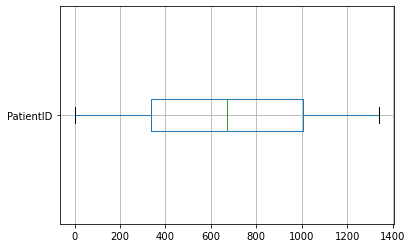

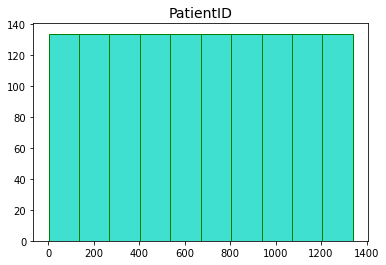

***Graph for Continuous data***



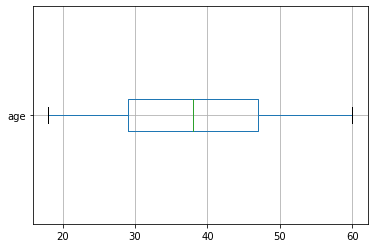

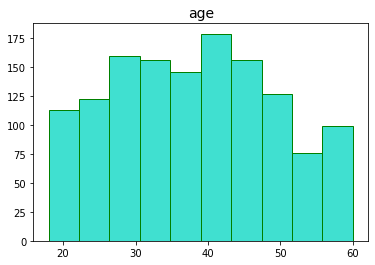

***Graph for Continuous data***



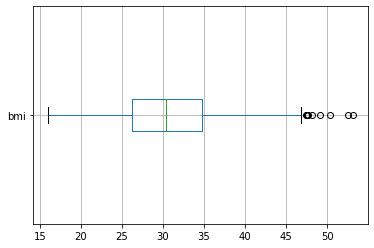

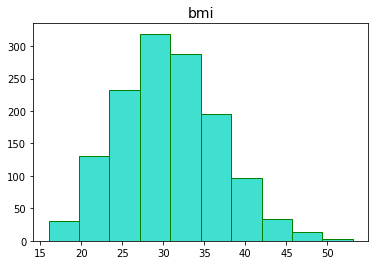

***Graph for Continuous data***



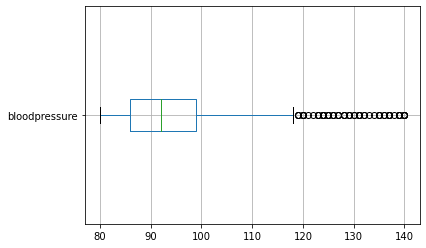

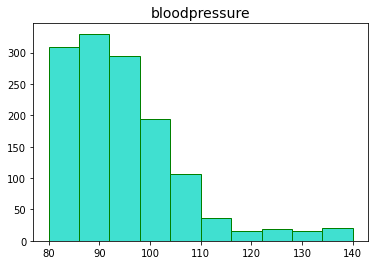

***Graph for Discrete data***



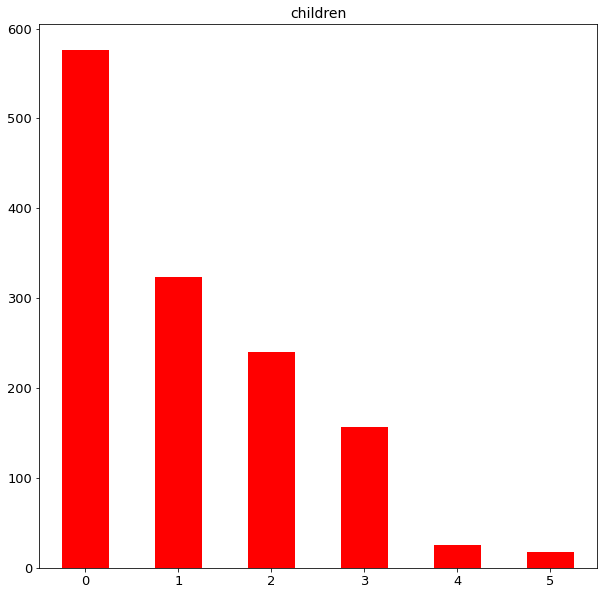

***Graph for Continuous data***



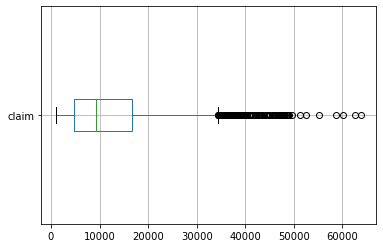

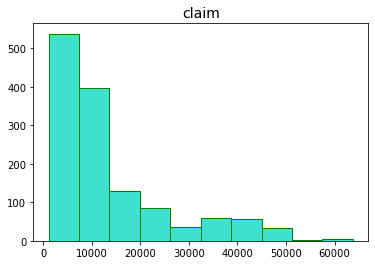


***Graphs for Categorical data***



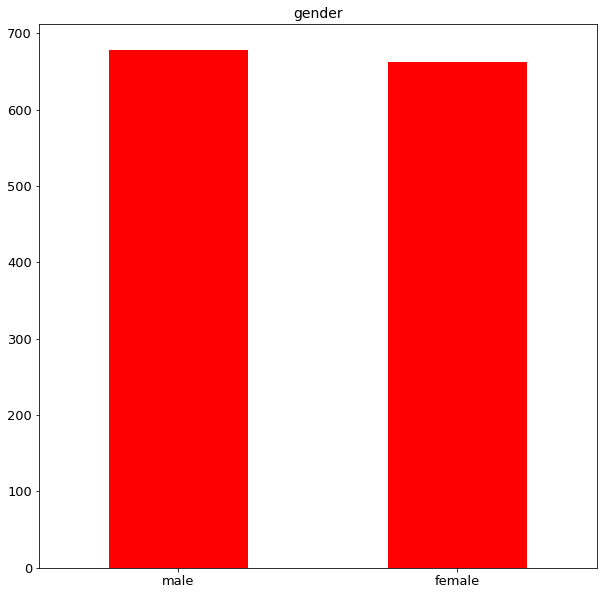

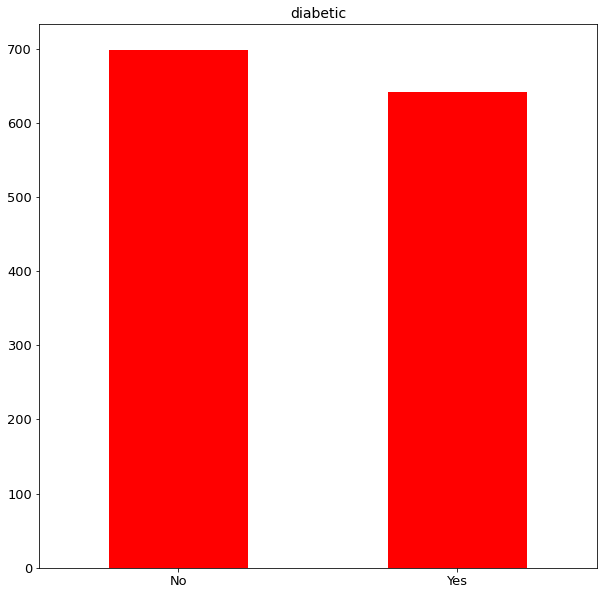

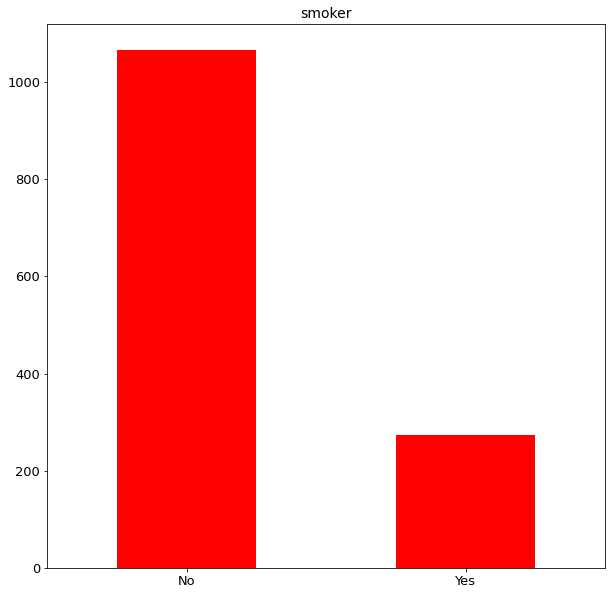

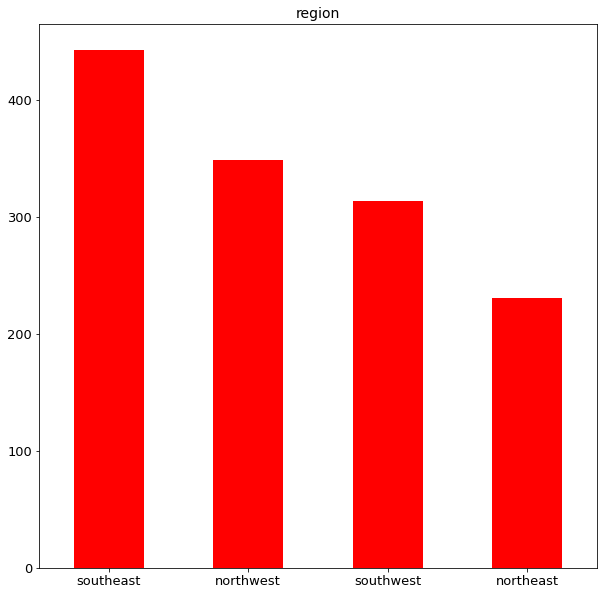

In [14]:
def Graph_v2(file_name):
    Numerical = []
    Categorical = []
    for columns in data:
        if (data.dtypes[columns] == 'int64') or (data.dtypes[columns] == 'float64'):
            Numerical.append(columns)
        else:
            Categorical.append(columns)
    
    print ("***Graphs for Numerical data***\n")
    for i in Numerical:
        if len(data[i].value_counts())>10:
            print ("***Graph for Continuous data***\n")
            data.boxplot(column = i,grid = True,figsize = (6,4),vert = False)  
            data.hist(column = i,grid = False,figsize = (6,4),color = "turquoise",edgecolor = "green")
            plt.title(i, fontsize = 14),
            plt.show()
        else:
            print ("***Graph for Discrete data***\n")
            data[i].value_counts().plot(kind = 'bar',rot=0, figsize = (10,10),color = "red",fontsize = 13)
            plt.title(i, fontsize = 14),
            plt.show()

    print ("\n***Graphs for Categorical data***\n")
    for i in Categorical or len(data[i].value_counts())<10:
        data[i].value_counts().plot(kind = 'bar',rot=0, figsize = (10,10),color = "red",fontsize = 13)
        plt.title(i, fontsize = 14),
        plt.show()
        
Graph_v2("insurance_data.csv")

## Observation:

**Age** : As per the graph we can observe that age is evenly distributed in the data. minimum age is 18 and maximum age is 60.majority of the people are in the age group of 20 to 45 years.

**BMI** :  As per the graph Majority of the patients are with BMI range of 25 to 37. very less people are with BMI range of 45 to 60. we can observe that graph is slightly rightly skewed.

**Bloodpressure** : As per the graph we can observe that majority of the people have bloodpressure range of 80 to 95. There are few people with bloodpressure range 110 to 140. We can observe that graph is rightly skewed.

**Children** : As per the observation from graph most of the people do not have any childeren and fwe people are with 1 to 2 no of childeren.

**Claim** : As per our observation many people have claim amount between 1500 to 15000 INR. Rest of the people have claim amount more than 20000 INR which are less in comparison.

**Region** : As per the graph we can observe that majority of the people are from southeast.

### Skewness test for Age

In [15]:
3*(data1.age.mean()-data1.age.median())/data1.age.std()

0.02129140393632131

**observation** : As per skewness test we can say age is symmetrically distributed and it is not skewed.

In [16]:
data1.age.mean(),data1.age.median(),data1.age.mode()

(38.078651685393254,
 38.0,
 0    43.0
 dtype: float64)

In [17]:
data.age.describe()

count    1335.000000
mean       38.078652
std        11.102924
min        18.000000
25%        29.000000
50%        38.000000
75%        47.000000
max        60.000000
Name: age, dtype: float64

In [18]:
gender=pd.crosstab(data1.gender,columns="Count")
gender

col_0,Count
gender,
female,662
male,678


In [19]:
value_gender=[662,678]
label_gender=["Female","Male"]

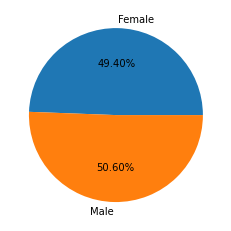

In [20]:
plt.pie(value_gender,labels=label_gender,autopct="%0.2f%%")
plt.show()

## Observation:

As per graph we can observe that male and female ratio is almost equal and we can say difference is negligible in between two genders.

In [21]:
diabetic = pd.crosstab(data1.diabetic , columns = "count")
diabetic

col_0,count
diabetic,
No,698
Yes,642


In [22]:
diabetic_value = [698,642]
diabetic_label = ["No","Yes"]

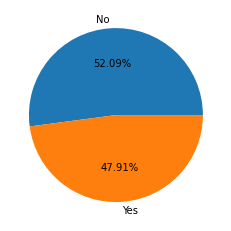

In [23]:
plt.pie(diabetic_value,labels=diabetic_label,autopct="%0.2f%%")
plt.show()

## Observation : 
As per the grapgh we can observe that difference between diabetic and non-diabetic people are almost negligible, we can say 50% of people are diabetic and 50% of people are non diabetic.

In [24]:
smoker = pd.crosstab(data1.smoker , columns = "count")
smoker

col_0,count
smoker,
No,1066
Yes,274


In [25]:
smoker_value = [1066,274]
smoker_label = ["No","Yes"]

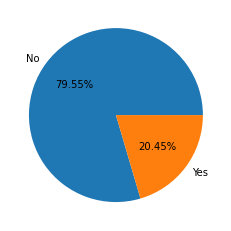

In [26]:
plt.pie(smoker_value,labels=smoker_label,autopct="%0.2f%%")
plt.show()

## Observation:

As per the graph we can observe that only 20% of the people are smoker from the whole poplulation and 80% of the people are non-smoker.


#### Assumption

##### 1)Patients with which type of condition are claiming more?
##### 2)Which conditions are more harmful to patient’s health?
##### 3)Is smoker is claiming more insurance?
##### 4)Is diabetic patient us claiming more insurance?
##### 5)How patient’s with blood pressure condition are claiming insurance? Is it more than other factors?
##### 6)Patient’s with obesity is claiming more?
##### 7)How many people have weight as per their bmi?
##### 8Claim as per region?
##### 9)Age group of patients who are claiming more? 
##### 10) Are all the regionregions having equal claim?

Text(0.5, 1.0, 'age vs claim')

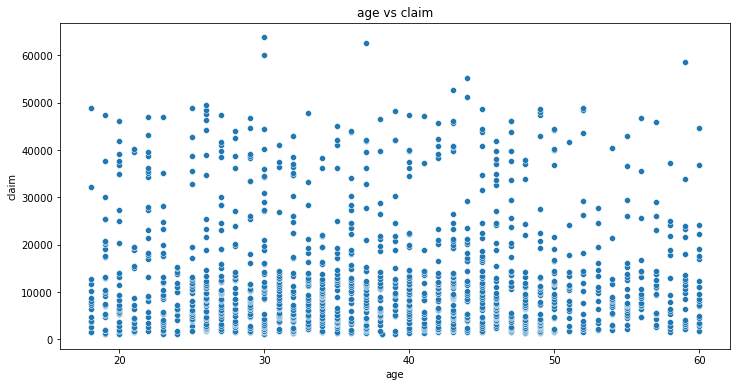

In [85]:
plt.figure(figsize=(12,6))
sns.scatterplot(y='claim' , x='age' , data=data1 )
plt.title("age vs claim")

### Hyotheisi

<AxesSubplot:title={'center':'claim'}, xlabel='gender'>

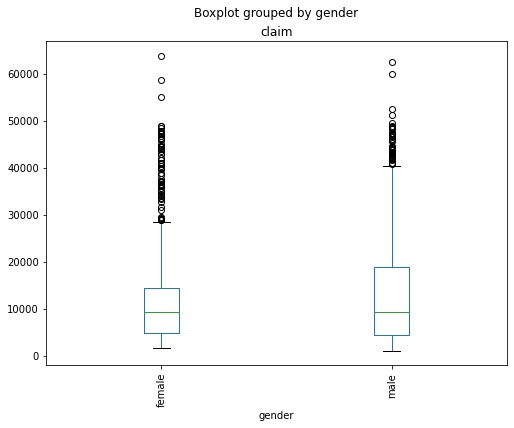

In [86]:
data.boxplot(column="claim",
             by="gender",
            grid=False,
            figsize=(8,6),
            rot=90)

H1: The average insurance claim amount of males is greater than that of females.

H0: The average insurance claim amount of males is lesser than or equal to that of females.

Testing the claim at a significance level = 0.05

This will be a right-tailed test.

In [87]:
stats.norm.isf(0.05) #Critical value

1.6448536269514729

In [88]:
X1 = data.loc[data["gender"] == 'male']
X1

,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01
...,...,...,...,...,...,...,...,...,...,...
1332,1333,26.0,male,37.0,120,No,2,Yes,southeast,49577.66
1333,1334,44.0,male,36.4,127,No,1,Yes,southwest,51194.56
1334,1335,43.0,male,32.8,125,No,0,Yes,southwest,52590.83
1337,1338,30.0,male,34.5,91,Yes,3,Yes,northwest,60021.40


In [89]:
X2 = data.loc[data["gender"] == 'female']
X2

,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
24,25,50.0,female,20.8,85,Yes,0,No,southeast,1607.51
26,27,36.0,female,26.7,97,Yes,0,No,southeast,1615.77
28,29,58.0,female,31.1,87,No,0,No,southeast,1621.88
29,30,35.0,female,31.4,93,No,0,No,southeast,1622.19
33,34,52.0,female,36.9,81,No,0,No,southeast,1629.83
...,...,...,...,...,...,...,...,...,...,...
1329,1330,52.0,female,37.7,109,Yes,0,Yes,southwest,48824.45
1330,1331,25.0,female,38.1,111,No,0,Yes,southeast,48885.14
1335,1336,44.0,female,35.5,88,Yes,0,Yes,northwest,55135.40
1336,1337,59.0,female,38.1,120,No,1,Yes,northeast,58571.07


In [90]:
var_male = X1.claim.var()
var_female = X2.claim.var()
var_male,var_female

(168213130.18546787, 123848048.63900773)

In [91]:
z_stat =  (X1.claim.mean() - X2.claim.mean())/np.sqrt((var_male/678)+(var_female/662))
z_stat

2.0467535789675115

In [92]:
from scipy import stats
stats.norm.sf(2.0467535789675115)

0.02034114281968148

#### P-value < alpha so we reject null hypothesis

#### So we conclude average claim of males is slightly greater than female. This might be due to the lifestyle variations between them. For instance, let us check if there is some dependency between males and smokers by Chi Square test of independence (i.e Contingency tables test)

### Chi-Square Test

**Ha: There is dependency in smokers and gender**
**H0: There is no dependency in smokers and gender** 
#### Female smoker = 115
#### male smoker = 159
#### female non-smoker = 547
#### male nonsmoker = 519

In [93]:
import numpy       as np
import scipy.stats as stats

quality_array = np.array([[159,115],[519,547]])

quality_array

array([[159, 115],
       [519, 547]])

In [94]:
import pandas      as pd
import numpy       as np
import scipy.stats as stats


chi_sq_Stat, p_value, deg_freedom, exp_freq = stats.chi2_contingency(quality_array, correction=False)
stats.chi2_contingency(quality_array)

print('Chi-square statistic %3.5f P value %1.6f Degrees of freedom %d' %(chi_sq_Stat, p_value,deg_freedom))
df = (2-1)*(2-1)
print("critical value is ", stats.chi2.isf(0.05, df))

Chi-square statistic 7.61119 P value 0.005801 Degrees of freedom 1
critical value is  3.8414588206941285


#### Chi-square_stat > chi_Critical so we reject the null hypthesis and conclude that there is no dependency between smoker and gender.
#### P-value < alpha so in right tail chi test it falls under rejection zone and we reject our null hypothesis

<AxesSubplot:xlabel='claim', ylabel='Density'>

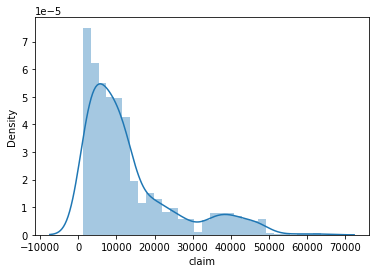

In [95]:
sns.distplot(data.claim)

**Observation** : We can observe that people from all age categories have claims between 0 to 10000 INR and fewer are more than 10000 INR claim which is also evenly distributed between age categories and we can't say that if higher or lower age people are claiming more claims of higher value. 

Text(0.5, 1.0, 'bmi vs claim')

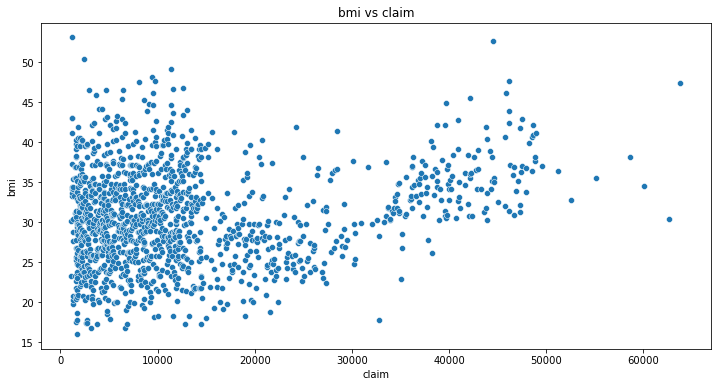

In [96]:
plt.figure(figsize=(12,6))
sns.scatterplot(y='bmi' , x='claim' , data=data1 )
plt.title("bmi vs claim")

**Observation** : Majority of people with bmi between 20 to 40 have more claims in range of 0 to 10000 INR, we can also observe that few people who have higher BMI have claims between 35000 to 50000 INR.

Text(0.5, 1.0, 'bloodpressure vs claim')

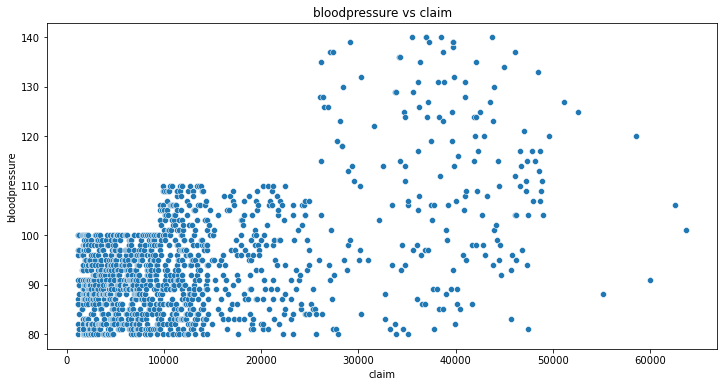

In [97]:
plt.figure(figsize=(12,6))
sns.scatterplot(y='bloodpressure' , x='claim' , data=data1 )
plt.title("bloodpressure vs claim")

**Observation** : Majority of the people with bloodpressure range 80 to 100 have claims between 1121 to 15000 INR, we can also observe that few people with higher bloodpressure range are having claim range of 35000 to 60000 INR which is high value compare to majority of people.

Text(0.5, 1.0, 'bloodpressure vs bmi')

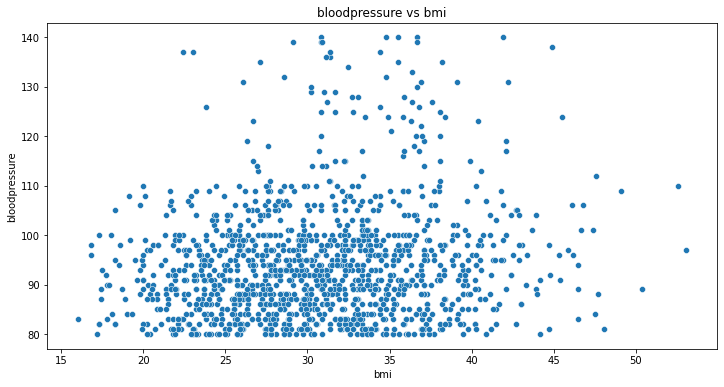

In [98]:
plt.figure(figsize=(12,6))
sns.scatterplot(y='bloodpressure' , x='bmi' , data=data1 )
plt.title("bloodpressure vs bmi")

<AxesSubplot:title={'center':'claim'}, xlabel='diabetic'>

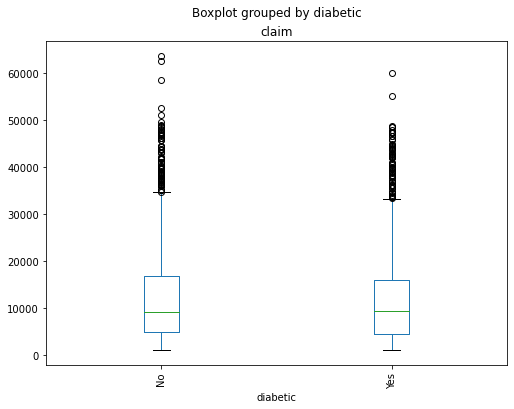

In [99]:
data.boxplot(column="claim",
             by="diabetic",
            grid=False,
            figsize=(8,6),
            rot=90)

In [100]:
gender = pd.crosstab

**Observation** : As per graph we can observe that majority of people with and without diabetes have a claim range of 1121 to 10000 INR. we can't say there is any linear relationship between diabetic patients and claim.

<AxesSubplot:title={'center':'claim'}, xlabel='children'>

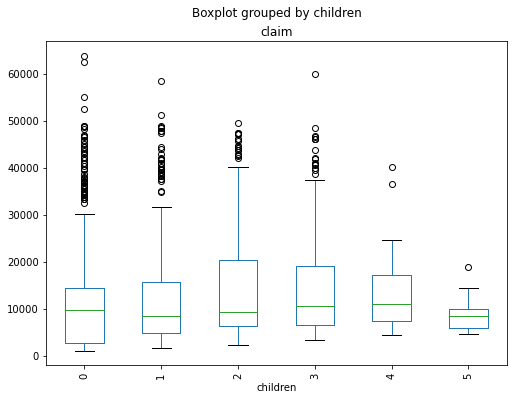

In [101]:
data.boxplot(column="claim",
             by="children",
            grid=False,
            figsize=(8,6),
            rot=90)

**Observation** : As per graph we can observe that people with 2 & 3 children have slightly higher claim compare to people with 1 & 2 children.

<AxesSubplot:title={'center':'claim'}, xlabel='smoker'>

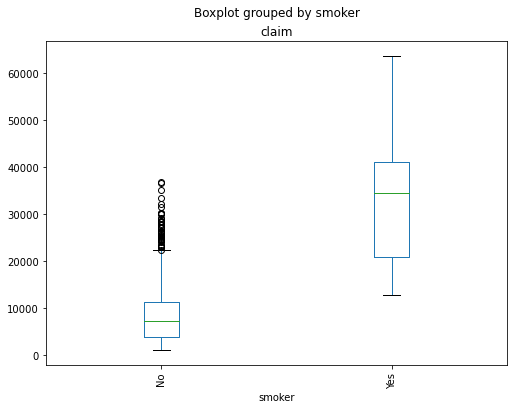

In [102]:
data.boxplot(column="claim",
             by="smoker",
            grid=False,
            figsize=(8,6),
            rot=90)

**Observation** : As per the graph we can clearly observe that people who smokes have a higher claims between 20000 to 40000 INR and people who do not smoke have a low claims in range of 1121 to 10000 INR.

<AxesSubplot:title={'center':'claim'}, xlabel='region'>

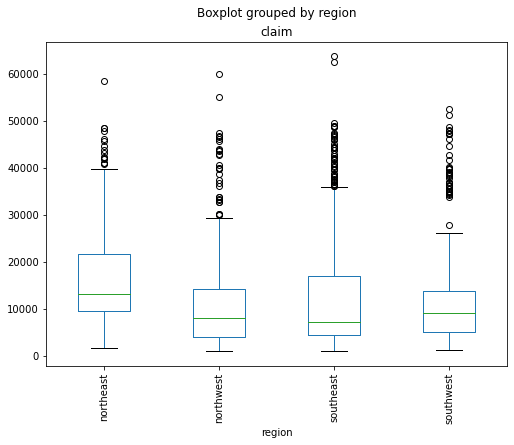

In [103]:
data.boxplot(column="claim",
             by="region",
            grid=False,
            figsize=(8,6),
            rot=90)

**Observation** :  As per the graph we can observe that majority of the claims are from northeast and southwest compare to northwest and southwest.

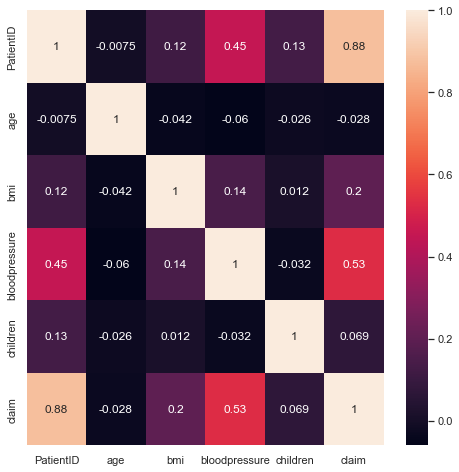

In [104]:
#ploting the heatmap for correlation
sns.set(rc = {'figure.figsize':(8,8)})
ax = sns.heatmap(data.corr(), annot=True)

In [105]:
data1.head()

,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,1,39.000000,male,23.2,91,Yes,0,No,southeast,1121.87
1,2,24.000000,male,30.1,87,No,0,No,southeast,1131.51
2,3,38.078652,male,33.3,82,Yes,0,No,southeast,1135.94
3,4,38.078652,male,33.7,80,No,0,No,northwest,1136.40
4,5,38.078652,male,34.1,100,No,0,No,northwest,1137.01


In [106]:
new_data = data1.copy()
new_data.head()

,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,1,39.000000,male,23.2,91,Yes,0,No,southeast,1121.87
1,2,24.000000,male,30.1,87,No,0,No,southeast,1131.51
2,3,38.078652,male,33.3,82,Yes,0,No,southeast,1135.94
3,4,38.078652,male,33.7,80,No,0,No,northwest,1136.40
4,5,38.078652,male,34.1,100,No,0,No,northwest,1137.01


In [107]:
X = new_data.drop(["claim"], axis=1)
X.head()

,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region
0,1,39.000000,male,23.2,91,Yes,0,No,southeast
1,2,24.000000,male,30.1,87,No,0,No,southeast
2,3,38.078652,male,33.3,82,Yes,0,No,southeast
3,4,38.078652,male,33.7,80,No,0,No,northwest
4,5,38.078652,male,34.1,100,No,0,No,northwest


In [110]:
data1.head()

,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,1,39.000000,male,23.2,91,Yes,0,No,southeast,1121.87
1,2,24.000000,male,30.1,87,No,0,No,southeast,1131.51
2,3,38.078652,male,33.3,82,Yes,0,No,southeast,1135.94
3,4,38.078652,male,33.7,80,No,0,No,northwest,1136.40
4,5,38.078652,male,34.1,100,No,0,No,northwest,1137.01


In [111]:
bins=[0,18.5, 24.9,30, 100] 
group= ['1','2','3','4'] # 1-low, 2-Average, 3-High, 4-very high
        
data1['bmi_bin']= pd.cut(data1['bmi'], bins, labels= group)

<AxesSubplot:xlabel='bmi_bin', ylabel='count'>

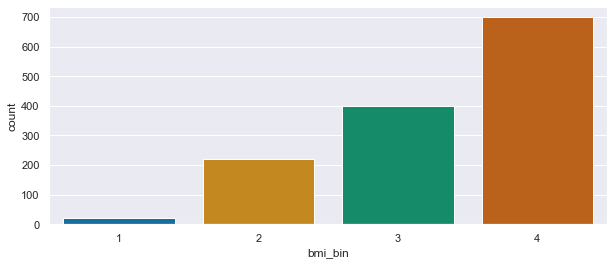

In [112]:
plt.subplots (figsize=(10,4))
sns.countplot (x='bmi_bin', data= data1, palette = 'colorblind')

In [113]:
bins=[0,60, 80, 120, 150] 
group= ['1','2', '3','4'] # 1-very low, 2-low, 3-Average, 4-High
        
data1['bp_bin']= pd.cut(data1['bloodpressure'], bins, labels= group)

<AxesSubplot:xlabel='bp_bin', ylabel='count'>

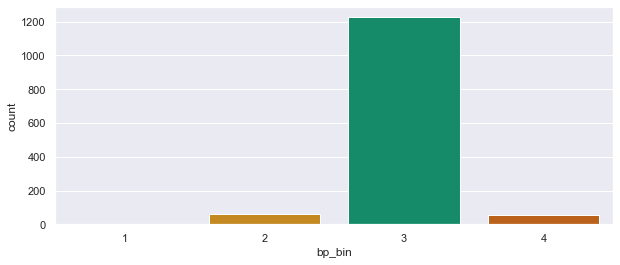

In [114]:
plt.subplots (figsize=(10,4))
sns.countplot (x='bp_bin', data= data1, palette = 'colorblind')

In [115]:
new_data =  pd.get_dummies(data1, columns = ['gender','diabetic','smoker','region'], drop_first=True)

In [116]:
new_data.head()

,PatientID,age,bmi,bloodpressure,children,claim,bmi_bin,bp_bin,gender_male,diabetic_Yes,smoker_Yes,region_northwest,region_southeast,region_southwest
0,1,39.000000,23.2,91,0,1121.87,2,3,1,1,0,0,1,0
1,2,24.000000,30.1,87,0,1131.51,4,3,1,0,0,0,1,0
2,3,38.078652,33.3,82,0,1135.94,4,3,1,1,0,0,1,0
3,4,38.078652,33.7,80,0,1136.40,4,2,1,0,0,1,0,0
4,5,38.078652,34.1,100,0,1137.01,4,3,1,0,0,1,0,0


### Standardized (Scaled) Predictors

Standardization: Bring the variables into a same scale where the mean of all variables are equal to 0 and the standard deviation is 1

In [117]:
def standardize(x):
    return((x - np.mean(x))/np.std(x))

In [118]:
new_data['age_scaled']=(new_data.age - new_data.age.mean())/new_data.age.std()
new_data['bmi_scaled']=(new_data.bmi - new_data.bmi.mean())/new_data.bmi.std()
new_data['bp_scaled']=(new_data.bloodpressure - new_data.bloodpressure.mean())/new_data.bloodpressure.std()
new_data.head()

,PatientID,age,bmi,bloodpressure,children,claim,bmi_bin,bp_bin,gender_male,diabetic_Yes,smoker_Yes,region_northwest,region_southeast,region_southwest,age_scaled,bmi_scaled,bp_scaled
0,1,39.000000,23.2,91,0,1121.87,2,3,1,1,0,0,1,0,8.313786e-02,-1.223069,-0.276130
1,2,24.000000,30.1,87,0,1131.51,4,3,1,0,0,0,1,0,-1.270387e+00,-0.093168,-0.625942
2,3,38.078652,33.3,82,0,1135.94,4,3,1,1,0,0,1,0,6.411582e-16,0.430843,-1.063207
3,4,38.078652,33.7,80,0,1136.40,4,2,1,0,0,1,0,0,6.411582e-16,0.496345,-1.238113
4,5,38.078652,34.1,100,0,1137.01,4,3,1,0,0,1,0,0,6.411582e-16,0.561846,0.510947


### Separating the Predictor and the Target


In [119]:
#Predictors
X = new_data.drop(["PatientID","age","bmi","bloodpressure","claim","region_northwest","region_southwest","bp_scaled","bmi_bin"],axis=1)
y = new_data.claim

In [120]:
X.head()

,children,bp_bin,gender_male,diabetic_Yes,smoker_Yes,region_southeast,age_scaled,bmi_scaled
0,0,3,1,1,0,1,8.313786e-02,-1.223069
1,0,3,1,0,0,1,-1.270387e+00,-0.093168
2,0,3,1,1,0,1,6.411582e-16,0.430843
3,0,2,1,0,0,0,6.411582e-16,0.496345
4,0,3,1,0,0,0,6.411582e-16,0.561846


### Train-Validation-Test Split

In [121]:
#Function test-train split
from sklearn.model_selection import train_test_split

In [122]:
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size = 0.2)

In [123]:
print(len(X_train), len(X_test))

1072 268


In [124]:
(X_train, X_valid, y_train, y_valid) = train_test_split(X_train, y_train, test_size = 0.25)

In [125]:
print(len(X_train), len(X_valid))

804 268


## Experiment 1

### Fitting a KNN Regressor

In [126]:
from sklearn.neighbors import KNeighborsRegressor

In [127]:
# Step-1: instantiate learning model (k = 7)
knn = KNeighborsRegressor(n_neighbors=5, metric='euclidean') # 3-NN using euclidean distance

# Step-2: fitting the model
knn.fit(X_train, y_train)

KNeighborsRegressor(metric='euclidean')

### Prediction

In [128]:
#Make prediction on the test data
predicted_values = knn.predict(X_valid)

### Accuracy Checks

In [129]:
# MAE (Mean Absolute Error)
np.mean(np.abs(y_valid - predicted_values))

5851.0140970149205

In [130]:
# MSE (Mean Squared Error)
np.mean((y_valid - predicted_values)**2)

60741333.38680804

In [131]:
# RMSE (Root Mean Squared Error)
np.sqrt(np.mean((y_valid - predicted_values)**2))

7793.672650734571

In [132]:
# MAPE (Mean Absolute Percentage Error)
Error = np.mean(np.abs(y_valid - predicted_values)/y_valid)*100
Error

103.07798724330503

### Choosing the best K

In [133]:
neighbour = np.arange(1,51)
mad = []

for k in neighbour:
    knn = KNeighborsRegressor(n_neighbors=k, metric="euclidean")
    knn.fit(X_train, y_train)
    predicted_values = knn.predict(X_valid)
    mad.append(np.mean(np.abs(y_valid - predicted_values)))

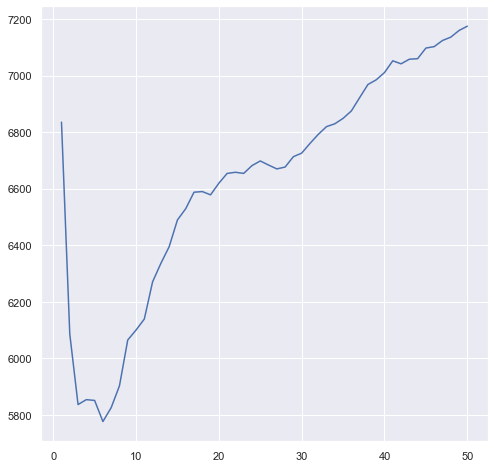

In [134]:
plt.plot(neighbour, np.array(mad))
plt.show()

### Testing On a Test Data

In [135]:
# Step-1: instantiate learning model 
knn = KNeighborsRegressor(n_neighbors=5, metric='euclidean') # k-NN using euclidean distance

# Step-2: fitting the model
knn.fit(X_train, y_train)

KNeighborsRegressor(metric='euclidean')

In [136]:
#Make prediction on the test data
predicted_values = knn.predict(X_test)

In [137]:
# MAE (Mean Absolute Error)
np.mean(np.abs(y_test - predicted_values))

5460.1007611940295

In [138]:
# MSE (Mean Squared Error)
np.mean((y_test - predicted_values)**2)

55616811.84785854

In [141]:
# RMSE (Root Mean Squared Error)
np.sqrt(np.mean((y_test - predicted_values)**2))

7457.667989918735

In [142]:
# MAPE (Mean Absolute Percentage Error)
Error = np.mean(np.abs(y_test - predicted_values)/y_test)*100
Error

82.11912522175867

## Experiment 2

In [143]:
#Predictors
X = new_data.drop(["PatientID","claim","region_northwest","gender_male","diabetic_Yes","bloodpressure","bp_bin","bmi_scaled","bmi"], axis=1)
y = new_data.claim

In [144]:
X.head()

,age,children,bmi_bin,smoker_Yes,region_southeast,region_southwest,age_scaled,bp_scaled
0,39.000000,0,2,0,1,0,8.313786e-02,-0.276130
1,24.000000,0,4,0,1,0,-1.270387e+00,-0.625942
2,38.078652,0,4,0,1,0,6.411582e-16,-1.063207
3,38.078652,0,4,0,0,0,6.411582e-16,-1.238113
4,38.078652,0,4,0,0,0,6.411582e-16,0.510947


In [145]:
#Function test-train split
from sklearn.model_selection import train_test_split

In [146]:
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size = 0.2)

In [147]:
print(len(X_train), len(X_valid))

1072 268


In [148]:
from sklearn.neighbors import KNeighborsRegressor

In [149]:
# Step-1: instantiate learning model (k = 7)
knn = KNeighborsRegressor(n_neighbors=9, metric='euclidean') # 3-NN using euclidean distance

# Step-2: fitting the model
knn.fit(X_train, y_train)

KNeighborsRegressor(metric='euclidean', n_neighbors=9)

In [150]:
#Make prediction on the test data
predicted_values = knn.predict(X_valid)

In [151]:
# MAE (Mean Absolute Error)
np.mean(np.abs(y_valid - predicted_values))

8666.658204809284

In [152]:
# MSE (Mean Squared Error)
np.mean((y_valid - predicted_values)**2)

175320654.5912753

In [153]:
# RMSE (Root Mean Squared Error)
np.sqrt(np.mean((y_valid - predicted_values)**2))

13240.87061304034

In [154]:
# MAPE (Mean Absolute Percentage Error)
np.mean(np.abs(y_valid - predicted_values)/y_valid)*100

118.44956256752013

## Choosing  best K

In [155]:
neighbour = np.arange(1,51)
mad = []

for k in neighbour:
    knn = KNeighborsRegressor(n_neighbors=k, metric="euclidean")
    knn.fit(X_train, y_train)
    predicted_values = knn.predict(X_valid)
    mad.append(np.mean(np.abs(y_valid - predicted_values)))

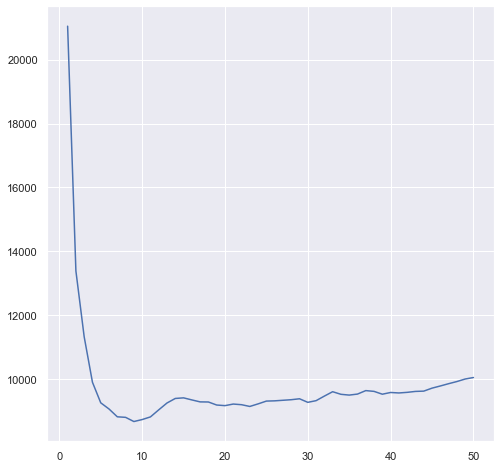

In [156]:
plt.plot(neighbour, np.array(mad))
plt.show()

### Decision Tree

In [157]:
#For test-train split
from sklearn.model_selection import train_test_split

#For fitting regression tree
from sklearn.tree import DecisionTreeRegressor

#To create a confusion matrix
from sklearn.metrics import confusion_matrix

#For plotting a decision tree
from sklearn import tree
import numpy as np

In [158]:
new_data.head()

,PatientID,age,bmi,bloodpressure,children,claim,bmi_bin,bp_bin,gender_male,diabetic_Yes,smoker_Yes,region_northwest,region_southeast,region_southwest,age_scaled,bmi_scaled,bp_scaled
0,1,39.000000,23.2,91,0,1121.87,2,3,1,1,0,0,1,0,8.313786e-02,-1.223069,-0.276130
1,2,24.000000,30.1,87,0,1131.51,4,3,1,0,0,0,1,0,-1.270387e+00,-0.093168,-0.625942
2,3,38.078652,33.3,82,0,1135.94,4,3,1,1,0,0,1,0,6.411582e-16,0.430843,-1.063207
3,4,38.078652,33.7,80,0,1136.40,4,2,1,0,0,1,0,0,6.411582e-16,0.496345,-1.238113
4,5,38.078652,34.1,100,0,1137.01,4,3,1,0,0,1,0,0,6.411582e-16,0.561846,0.510947


In [159]:
X = new_data.drop(["claim","region_southeast","gender_male","bloodpressure","bmi_bin","PatientID","age_scaled","bmi_scaled","bp_scaled","children"], axis=1)
y = new_data.claim
X.head()

,age,bmi,bp_bin,diabetic_Yes,smoker_Yes,region_northwest,region_southwest
0,39.000000,23.2,3,1,0,0,0
1,24.000000,30.1,3,0,0,0,0
2,38.078652,33.3,3,1,0,0,0
3,38.078652,33.7,2,0,0,1,0
4,38.078652,34.1,3,0,0,1,0


In [160]:
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size = 0.2)

In [161]:
print(len(X_train), len(X_test))

1072 268


In [162]:
#Train-Validation Split
X_train,X_valid,y_train,y_valid=train_test_split(X,y,test_size=0.2,random_state=0)

In [163]:
print(len(X_train), len(X_valid))

1072 268


In [164]:
# Fitting a regression tree
reg_tree = DecisionTreeRegressor(max_depth=5, min_samples_leaf=25) 
reg_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=25)

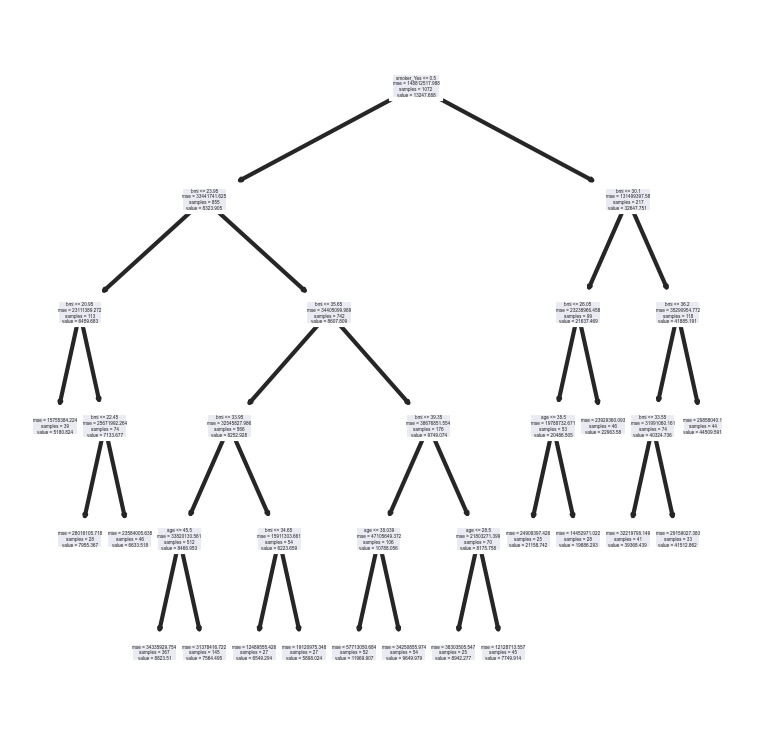

In [165]:
# Plotting a regression tree
fig, axes = plt.subplots(figsize=(3,3), dpi=300)

tree.plot_tree(reg_tree, feature_names=list(X), filled = False)

plt.show()

In [166]:
#Prediction
y_pred = reg_tree.predict(X_valid)
y_pred

array([ 7564.49482759,  8823.50989101,  7749.91355556,  7749.91355556,
        8823.50989101, 11969.90653846, 41512.86242424,  8823.50989101,
        8823.50989101,  8823.50989101,  7564.49482759,  7564.49482759,
       19886.29285714,  5180.82358974,  8823.50989101,  8823.50989101,
        8823.50989101,  8823.50989101, 39368.43926829,  7564.49482759,
        8823.50989101,  7749.91355556, 39368.43926829,  6549.29407407,
        9649.97851852,  8823.50989101, 41512.86242424,  7564.49482759,
        7564.49482759, 19886.29285714,  7955.36678571,  8823.50989101,
        5180.82358974, 22963.57978261,  6633.5176087 ,  7564.49482759,
       44509.59136364,  7564.49482759,  8942.2772    ,  7955.36678571,
        8823.50989101, 39368.43926829, 22963.57978261, 39368.43926829,
       22963.57978261, 11969.90653846,  8823.50989101,  6549.29407407,
       39368.43926829, 11969.90653846,  6633.5176087 ,  9649.97851852,
        7564.49482759,  6633.5176087 ,  8823.50989101,  8823.50989101,
      

In [167]:
# MAE
np.mean(np.abs(y_valid - y_pred))

4846.191139711616

In [168]:
# MSE
np.mean((y_valid - y_pred)**2)

44569645.922970995

In [169]:
# RMSE
np.sqrt(np.mean((y_valid - y_pred)**2))

6676.050173790712

In [170]:
# MAPE
np.mean(np.abs(y_valid - y_pred)/y_valid)*100

82.87059191637786

### Hyperparameter Tuning - Choosing Best Depth

In [171]:
depth = np.arange(1,15)
mae = []

for k in depth:
    reg_tree = DecisionTreeRegressor(max_depth=k, min_samples_leaf=5)
    reg_tree.fit(X_train, y_train)
    y_pred = reg_tree.predict(X_valid)
    mae.append(np.mean(np.abs(y_valid - y_pred)))

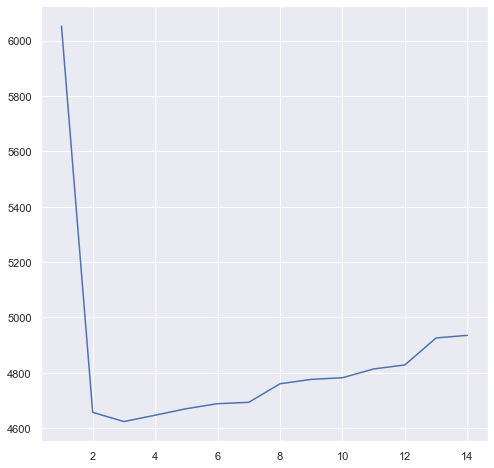

In [172]:
plt.plot(depth, np.array(mae))
plt.show()

### Test Data Experiment

In [173]:
# Fitting a regression tree
reg_tree = DecisionTreeRegressor(max_depth=7, min_samples_leaf=15) 
reg_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=7, min_samples_leaf=15)

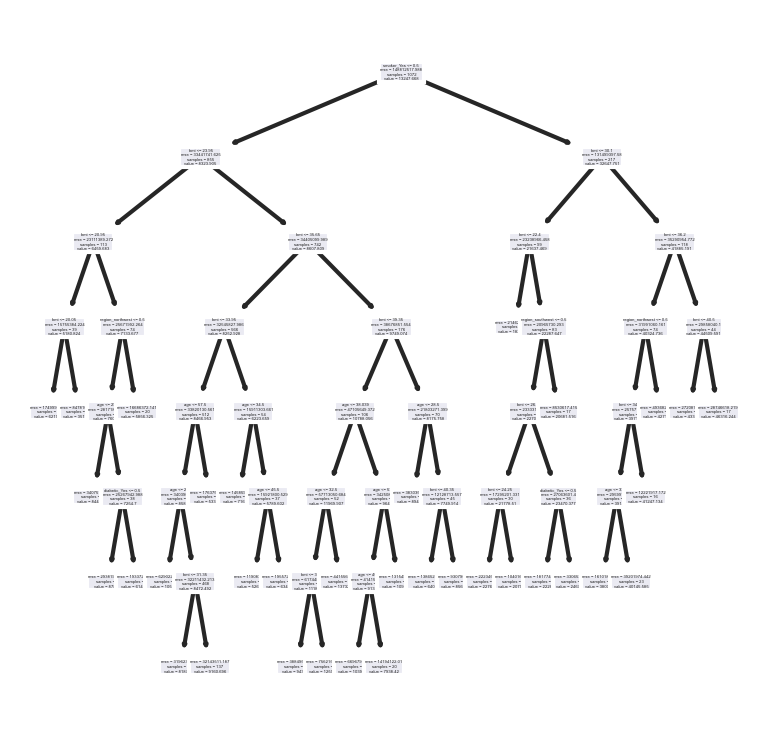

In [174]:
# Plotting a regression tree
fig, axes = plt.subplots(figsize=(3,3), dpi=300)

tree.plot_tree(reg_tree, feature_names=list(X), filled = False)

plt.show()

In [175]:
#Prediction
y_pred = reg_tree.predict(X_test)
y_pred

array([ 8187.64561934,  5856.3245    ,  8784.2       ,  7938.4205    ,
        9160.69627737,  8187.64561934, 20790.01266667, 20790.01266667,
       22767.008     ,  8942.2772    , 43372.06962963,  9160.69627737,
        8187.64561934,  9160.69627737,  8566.80821429,  9160.69627737,
        8187.64561934, 24671.295     ,  5263.31631579,  9160.69627737,
        8566.80821429,  9160.69627737,  9160.69627737, 10536.23038462,
        8187.64561934,  9160.69627737,  8942.2772    ,  6345.12555556,
       10985.26      ,  7168.37117647,  9430.83      , 18264.6725    ,
       38003.036     , 40145.58478261,  8187.64561934, 20790.01266667,
        8187.64561934, 12591.3575    ,  8187.64561934,  9160.69627737,
        9430.83      ,  8187.64561934,  8187.64561934,  7938.4205    ,
        9160.69627737, 10985.26      ,  8566.80821429,  8187.64561934,
       12591.3575    ,  9160.69627737,  6142.33590909, 12591.3575    ,
        6219.25875   ,  9160.69627737,  8187.64561934,  5263.31631579,
      

In [176]:
# MAE
np.mean(np.abs(y_test - y_pred))

4265.678909071098

In [177]:
# MSE
np.mean((y_test - y_pred)**2)

35613856.63049117

In [178]:
# RMSE
np.sqrt(np.mean((y_test - y_pred)**2))

5967.734631373212

In [179]:
# MAPE
np.mean(np.abs(y_test - y_pred)/y_valid)*100

104.57074766624214

## Linear Regression

### Segregating variables: Independent and Dependent Variables

In [186]:
#seperating independent and dependent variables
x = new_data.drop(["claim","bp_bin","bmi_bin","age_scaled","bmi_scaled","bp_scaled",
"PatientID"], axis=1)
y = new_data.claim
x.head()

,age,bmi,bloodpressure,children,gender_male,diabetic_Yes,smoker_Yes,region_northwest,region_southeast,region_southwest
0,39.000000,23.2,91,0,1,1,0,0,1,0
1,24.000000,30.1,87,0,1,0,0,0,1,0
2,38.078652,33.3,82,0,1,1,0,0,1,0
3,38.078652,33.7,80,0,1,0,0,1,0,0
4,38.078652,34.1,100,0,1,0,0,1,0,0


### Splitting the data into train set and the test set

In [187]:
# Importing the train test split function
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 56)

### Implementing Linear Regression

In [192]:
from sklearn.linear_model import LinearRegression

In [193]:
X = new_data.drop(['claim','PatientID'],axis=1)
y = new_data.claim

In [194]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25)

In [195]:
lr = LinearRegression()

In [196]:
lr.fit(X_train,y_train)

LinearRegression()

In [197]:
y_pred = lr.predict(X_test)
y_pred

array([ 7861.82432263,  5431.74485775,  9690.83821748, 10340.17924168,
       11307.32086503,  5588.98485179,  3320.32252868,  9670.245683  ,
        8254.62097856, 12141.81837113,  7109.64812204, 31096.99579136,
        9339.78778185, 14759.57389681, 24006.26591976, 13003.69901379,
        9016.25021364,  8370.41968877,  7289.84406868,  6235.77769887,
       34852.34603731,  2030.79210665, 10427.26814732, 28981.77927052,
        6893.07440811, 15928.85248653,  9337.42285585, 11696.41082528,
       10389.96856061, 15011.42927625, 41005.64451289,  7229.97158308,
        4453.20830782, 40365.16625737,  3131.00286148, 36139.37314994,
       13499.64642828,  3960.82423856,  8017.29121127,  6972.34433664,
        9636.82504419,  6466.82624517,  8405.77412855,  6454.85627444,
        9250.02856378, 14544.02520684,  6918.64587341,  9385.41008272,
       10001.79511418, 10127.96665241, 34080.38369305,  6441.55324653,
        9267.42937345, 29991.40992848, 12784.37310144,  5620.29516708,
      

In [198]:
np.mean(np.abs(y_test-y_pred)/y_test)*100

76.74024334176049

In [199]:
lr.score(X_train,y_train)

0.6999079154776138

In [200]:
lr.score(X_test,y_test)

0.7334392968004866

In [201]:
np.mean(np.abs(y_test - y_pred))

4693.434970735593

### Parameters of Linear Regression

In [202]:
lr.coef_

array([ 1.72242991e+00,  2.18873480e+02,  2.28170671e+02,  5.93258025e+02,
        1.23579301e+03,  1.80901396e+02, -3.49013804e+01, -4.67411906e+02,
        2.08104352e+04, -2.31594991e+03, -2.72768793e+03, -2.12564370e+03,
        1.55423458e-01,  3.58413274e+01,  1.99542127e+01])

### Plotting the coefficients

Text(0.5, 1.0, 'Coefficient plot')

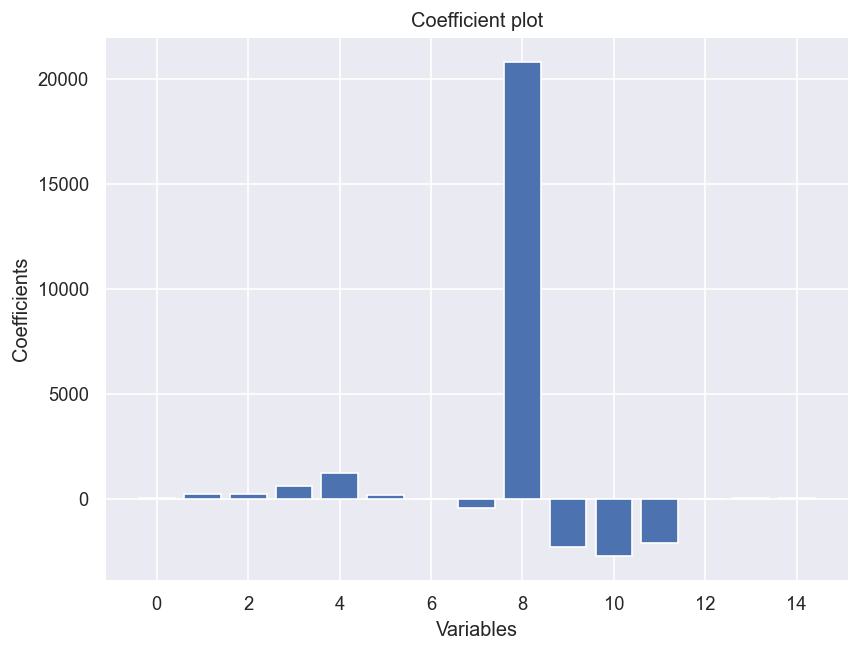

In [205]:
plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b')
x = range(len(X_train.columns))
y = lr.coef_
plt.bar( x, y )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.title('Coefficient plot')

## Checking assumptions of Linear Mode

In [206]:
# Arranging and calculating the Residuals
residuals = pd.DataFrame({
    'fitted values' : test_y,
    'predicted values' : test_predict,
})

residuals['residuals'] = residuals['fitted values'] - residuals['predicted values']
residuals.head()

,fitted values,predicted values,residuals
1223,36837.47,28074.863142,8762.606858
77,1875.34,8614.763234,-6739.423234
704,9866.30,9205.987742,660.312258
553,7633.72,10320.735282,-2687.015282
1157,27117.99,4448.172423,22669.817577


### Checking Distribution of Residuals

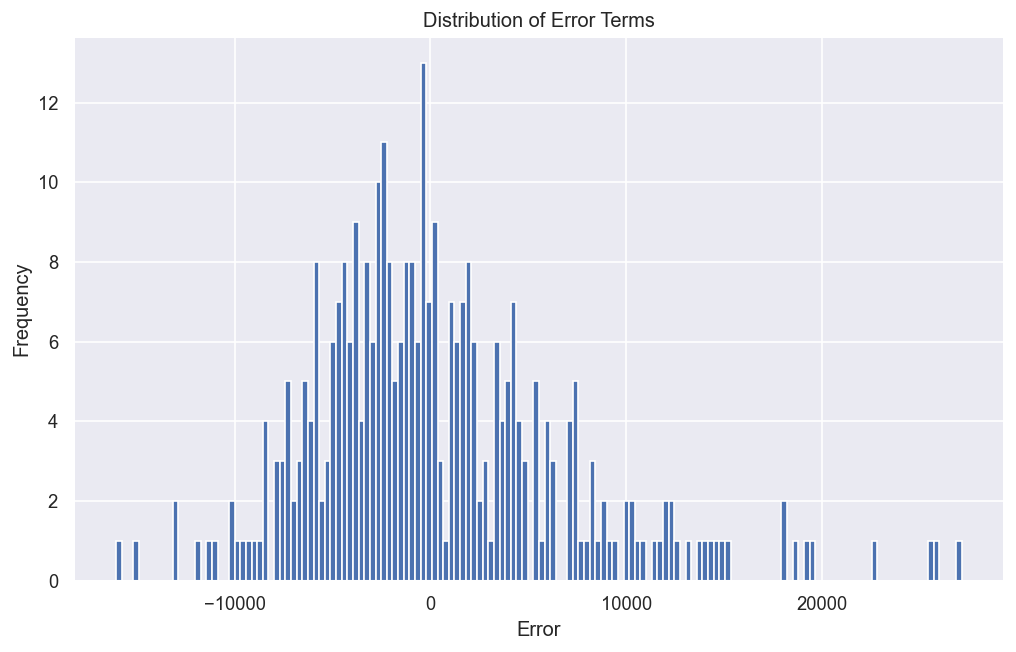

In [208]:
# Histogram for distribution
plt.figure(figsize=(10, 6), dpi=120, facecolor='w', edgecolor='b')
plt.hist(residuals.residuals, bins = 150)
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Distribution of Error Terms')
plt.show()

### QQ-Plot (Is the data Normally Distributed?)

**Observation** : Errors are normaly distributed